In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_excel("Data/tr.xlsx",)

In [2]:
over_missing_sample = []
row_value_count = train_data.apply(pd.Series.value_counts,axis=1,dropna=False)

In [3]:
import tools
#Data transform
train_y = pd.DataFrame(train_data['outcome']) 
train_X = pd.DataFrame(train_data.drop(['outcome'],axis=1))

train_X = tools.data_transform(train_X)

In [4]:
import tools
tools.set_pandas_display_options()
#train_X.describe()

In [5]:
threshhold =len(train_X.columns)*0.25
over_missing = row_value_count[np.nan]<=threshhold
class_0 = train_y['outcome']==1

print(sorted(train_y.value_counts()))
train_X = train_X[over_missing|class_0]
train_y = train_y[over_missing|class_0]
print(sorted(train_y.value_counts()))


[879, 51280]
[879, 27076]


In [6]:
# Data split
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(
    train_X ,
    train_y,
    test_size=0.2,
    random_state=42)

print(sorted(train_y.value_counts()))
print(sorted(val_y.value_counts()))

[718, 21646]
[161, 5430]


In [7]:
# Missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import tools
feature_kind = tools.init_feature_kind(train_X)
cont,cate = tools.get_feature_kind(train_X,feature_kind)  

strategy = 'median'

imp_mean = IterativeImputer(max_iter=100,random_state=0)
imp_mean.fit(train_X[cont])

train_X[cont] = imp_mean.transform(train_X[cont])
val_X[cont] = imp_mean.transform(val_X[cont])

print("filled continuous missing value with "+strategy)

strategy = 'constant'

imp = SimpleImputer(missing_values=np.nan, strategy=strategy,fill_value=10.0)
imp.fit(train_X[cate])

train_X[cate] = imp.transform(train_X[cate])
val_X[cate] = imp.transform(val_X[cate])


print("filled nominal missing value with ",strategy)


filled continuous missing value with median
filled nominal missing value with  constant


In [8]:
from sklearn import preprocessing


cont,cate = tools.get_feature_kind(train_X,feature_kind)

scaler = preprocessing.StandardScaler().fit(train_X[cont])
train_X[cont] = scaler.transform(train_X[cont])
val_X[cont] = scaler.transform(val_X[cont])


In [9]:
from sklearn.preprocessing import OneHotEncoder


end =OneHotEncoder()
onehot_train_X = pd.DataFrame(end.fit_transform(train_X[cate]).toarray())
onehot_val_X = pd.DataFrame(end.transform(val_X[cate]).toarray())

train_X = train_X.reset_index(drop=True)
val_X = val_X.reset_index(drop=True)

train_X = pd.concat([train_X[cont],onehot_train_X],axis=1,ignore_index=True)
val_X = pd.concat([val_X[cont],onehot_val_X],axis=1,ignore_index=True)

In [10]:
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,-0.816766,-0.149116,0.326534,0.174376,0.987036,0.033720,-0.048645,-0.111790,-0.031080,0.009028,0.061228,-0.254103,-0.678105,-0.146323,0.474443,-0.959558,0.085735,1.952211,-0.777544,0.061762,-1.286230,0.510489,0.053968,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.461019,0.549548,-0.473576,-0.582417,0.265156,0.876995,0.350120,0.492818,-0.979046,-0.978990,-0.366887,-0.687642,1.060124,-1.001496,-0.642221,0.328820,0.038968,0.841940,0.821795,-0.403654,0.236108,-0.084837,2.459291,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-2.185804,1.597544,0.326534,0.174376,0.366394,0.005818,-0.039303,-0.081876,-0.023800,0.005536,0.042112,0.108333,0.053045,0.050813,-0.825683,-0.948270,-0.065076,0.434458,-0.777544,-0.766138,-1.428566,-1.220110,0.550192,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.091981,0.549548,-0.473576,-0.582417,1.915743,1.552617,1.671741,1.612364,-0.170401,0.125865,0.816450,-0.626208,0.977116,-0.592952,1.726898,1.554656,-0.063921,-0.215461,1.048651,0.561046,1.270329,2.476449,0.665577,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.333576,0.200216,1.126643,1.687963,1.187543,0.475274,0.470268,0.323830,-0.546515,-0.114321,0.934784,-0.677403,-0.500425,-0.144767,-0.801125,0.016610,0.095089,0.525977,0.193258,-0.219724,0.393330,0.564153,-1.128137,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22359,-1.058361,-0.498448,-0.473576,-0.582417,-1.433977,0.931775,-1.151721,-0.964704,-3.799900,-3.572999,-1.313557,-0.472622,0.412662,1.168907,-0.093279,0.003599,-0.082628,-0.638422,0.051467,-0.155786,0.053220,-0.552470,-0.855674,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
22360,0.954930,-0.498448,-0.473576,-0.582417,-0.026124,2.447360,-0.430837,0.

In [11]:
def y_onehot(y):
    mapped = []
    
    for ind,lab in y.iterrows():
        if(lab[0]==0):
            mapped.append([1,0])
        elif(lab[0]==1):
            mapped.append([0,1])
        else:
            print(lab)
            print('error')
    return mapped
map_train_y = y_onehot(train_y)
map_val_y = y_onehot(val_y)

In [12]:
from torch.utils.data import DataLoader, Dataset
class TrainDataset(Dataset):
    def __init__(self,X,y) -> None:
        super().__init__()
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self, index) :
        return torch.tensor(self.X.iloc[index]).to(device),torch.tensor(self.y[index]).to(device)

In [13]:
from torch.utils.data import dataloader
import torch

device = torch.device('cuda')

train_dataset = TrainDataset(train_X,map_train_y)
val_dataset = TrainDataset(val_X,map_val_y)

In [14]:
from torch.utils.data.sampler import WeightedRandomSampler
def balance_prob(y):
    print(y.value_counts())
    prob = 1/y.value_counts()
    print(prob)
    dataset_element_weights = [] # each element prob
    for label_id in y:                
        dataset_element_weights.append(prob[label_id])
    return dataset_element_weights

balance_prob = balance_prob(train_y['outcome'])
sampler = WeightedRandomSampler(weights=balance_prob,num_samples=len(map_train_y),replacement=True)

0    21646
1      718
Name: outcome, dtype: int64
0    0.000046
1    0.001393
Name: outcome, dtype: float64


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# Create CNN Model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 6, 1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=1)
        self.conv2 = nn.Conv1d(6, 16, 1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=1)
        self.fc1 = nn.Linear(1984, 480)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(480, 120)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(120,32)
        self.relu5 = nn.ReLU()
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(1)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x),1)
        return x

In [12]:
Net().modules

<bound method Module.modules of Net(
  (conv1): Conv1d(1, 6, kernel_size=(1,), stride=(1,))
  (relu1): ReLU()
  (pool1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(6, 16, kernel_size=(1,), stride=(1,))
  (relu2): ReLU()
  (pool2): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1984, out_features=480, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=480, out_features=120, bias=True)
  (relu4): ReLU()
  (fc3): Linear(in_features=120, out_features=32, bias=True)
  (relu5): ReLU()
  (fc4): Linear(in_features=32, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)>

In [31]:
from torch.utils.data import WeightedRandomSampler

import torch.nn as nn
# Hyper parm
# batch_size, epoch and iteration
batch_size = 100
n_iters = 11000
num_epochs = 50
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, sampler=sampler)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, shuffle = False)


model = Net()
model.to(device)
# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters())
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)

In [32]:
from torch.autograd import Variable
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

model.train()
performace = {}
train_loss = []
val_loss = []


for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):
        

        optimizer.zero_grad() # Clear gradients
        outputs = model(Variable(X.float().to(device))) # Forward propagation
        #print(outputs)
       # print(y.float())
        #print(outputs)
        loss = error(outputs,y.float()) # Calculate softmax and cross entropy loss
        loss.backward() # Calculating gradients
        train_loss.append(loss.data.item())
        optimizer.step() # Update parameters
       
        count += 1
        
        if count%100 == 0:
            # Calculate Accuracy         
            predict = []
            true = []
            model.eval()
            # Predict val dataset
            for X, y in val_loader:
                #print(X.float())
                outputs = model(X.float()) # Forward propagation
                loss = error(outputs,y.float())
                val_loss.append(loss.data.item())
                outputs = outputs.cpu().detach().numpy()
                y = y.cpu().detach().numpy()
                
                for pred in outputs:
                    predict.append(np.argmax(pred))
                for label in y:
                    true.append(np.argmax(label))
                
            #print(true)
           # print(predict)
            performace[count] = (tools.get_performance(true,predict))
            
            
            print("iter:",count,"train loss:",np.average(train_loss),"val_loss:",np.average(val_loss))
            print("val")
            print("f1_score:",performace[count]['f1_score'],'confusion matrix:\n',performace[count]['confusion matrix'])
            print()
            performace[count]['train_loss'] = np.average(train_loss)
            performace[count]['val_loss'] = np.average(val_loss)
                
            train_loss = []
            val_loss = []    
            model.train()
    
        


iter: 100 train loss: 0.5407660639286042 val_loss: 0.4897757369492735
val
f1_score: 0.20300751879699247 confusion matrix:
 [[4396 1034]
 [  26  135]]

iter: 200 train loss: 0.4758015489578247 val_loss: 0.3812179373843329
val
f1_score: 0.3616352201257862 confusion matrix:
 [[5070  360]
 [  46  115]]

iter: 300 train loss: 0.46571595549583433 val_loss: 0.3985318083848272
val
f1_score: 0.32570659488559894 confusion matrix:
 [[4969  461]
 [  40  121]]

iter: 400 train loss: 0.46345084846019746 val_loss: 0.39329408055969645
val
f1_score: 0.3394109396914446 confusion matrix:
 [[4999  431]
 [  40  121]]

iter: 500 train loss: 0.46040013372898103 val_loss: 0.3711638871048178
val
f1_score: 0.40630472854640975 confusion matrix:
 [[5136  294]
 [  45  116]]

iter: 600 train loss: 0.46523674339056015 val_loss: 0.41769231483340263
val
f1_score: 0.29917550058892817 confusion matrix:
 [[4869  561]
 [  34  127]]

iter: 700 train loss: 0.46013553291559217 val_loss: 0.44266385797943386
val
f1_score: 0.25

<AxesSubplot:>

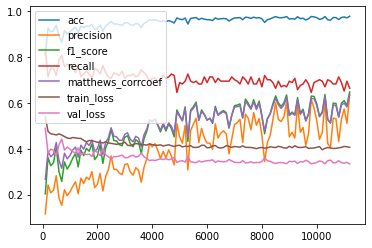

In [33]:
#print(pd.DataFrame(performace).T)    
pd.DataFrame(performace).T.plot()

In [34]:
torch.save(model.state_dict(), 'CNNweight')

In [35]:
final_performance = {}
predict = []
true = []
model.eval()
for X, y in val_loader:
    #print(X.float())
    outputs = model(X.float()) # Forward propagation
    val_loss = error(outputs,y.float())
    outputs = outputs.cpu().detach().numpy()
    y = y.cpu().detach().numpy()
    
    for pred in outputs:
        predict.append(np.argmax(pred))
    for label in y:
        true.append(np.argmax(label))
final_performance['val'] = tools.get_performance(true,predict)
predict = []
true = []
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)

for X, y in train_loader:
    #print(X.float())
    outputs = model(X.float()) # Forward propagation
    val_loss = error(outputs,y.float())
    outputs = outputs.cpu().detach().numpy()
    y = y.cpu().detach().numpy()
    
    for pred in outputs:
        predict.append(np.argmax(pred))
    for label in y:
        true.append(np.argmax(label))
final_performance['train'] = tools.get_performance(true,predict)

In [36]:
pd.DataFrame(final_performance)

,val,train
confusion matrix,"[[5368, 62], [54, 107]]","[[21474, 172], [123, 595]]"
acc,0.979252,0.986809
precision,0.633136,0.77575
f1_score,0.648485,0.801347
recall,0.664596,0.828691
matthews_corrcoef,0.638001,0.794996
